## Extract the label and other information from the pictures

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-whitegrid')
import seaborn as sns

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset

In [3]:
import os
import pickle
from PIL import Image
import numpy as np

## Load the Baseline Model (5 epochs)

## Baseline Model

In [4]:
# Load the baseline model
baseline_model = torch.load("Baseline_Model_Result.pt")
print(baseline_model)

{'train_loss': [2.49271379776001, 1.7481423896365695, 1.551119006284078, 1.3873988092422485, 1.2740918633990819], 'train_acc': [tensor(20.4333, device='cuda:0'), tensor(34.5778, device='cuda:0'), tensor(42.6622, device='cuda:0'), tensor(49.1200, device='cuda:0'), tensor(53.7178, device='cuda:0')], 'val_loss': [1.9083701454162598, 1.6764677837371826, 1.505303465270996, 1.3444784107208252, 1.2709140168190003], 'val_acc': [tensor(28.5600, device='cuda:0'), tensor(37.5600, device='cuda:0'), tensor(44.8800, device='cuda:0'), tensor(51.7600, device='cuda:0'), tensor(54.1800, device='cuda:0')], 'test_loss': [1.8903517332077027, 1.6917180431365966, 1.4667416591644287, 1.2988158313751221, 1.241716276550293], 'test_acc': [tensor(30.3400, device='cuda:0'), tensor(40.1500, device='cuda:0'), tensor(45.7100, device='cuda:0'), tensor(53.2400, device='cuda:0'), tensor(54.4500, device='cuda:0')], 'iter': [0, 352, 704, 1056, 1408, 1760]}


### Training Loss and Accuracy (CIFAR10)

In [5]:
# Record the each value in the history dictionary 
baseline_train_loss = baseline_model["train_loss"]
baseline_train_acc = baseline_model["train_acc"]
baseline_valid_loss = baseline_model["val_loss"]
baseline_valid_acc = baseline_model["val_acc"]

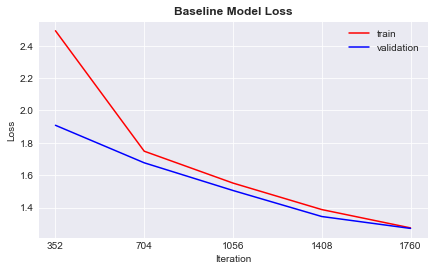

In [6]:
# Plot the loss result
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (7, 4))
plt.title("Baseline Model Loss", fontweight = "bold")
plt.xticks([0, 1, 2, 3, 4], [352, 704, 1056, 1408, 1760])
plt.plot(baseline_train_loss, "r-", label = "train")
plt.plot(baseline_valid_loss, "b-", label = "validation")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

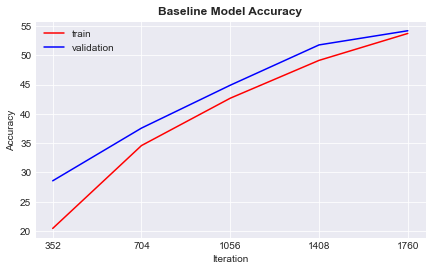

In [7]:
# Plot the accuracy result
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (7, 4))
plt.title("Baseline Model Accuracy", fontweight = "bold")
plt.xticks([0, 1, 2, 3, 4], [352, 704, 1056, 1408, 1760])
plt.plot(baseline_train_acc, "r-", label = "train")
plt.plot(baseline_valid_acc, "b-", label = "validation")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
# Calculate the average test accuracy
baseline_valid_acc = torch.stack(baseline_model["val_acc"])
print(torch.max(baseline_valid_acc))

baseline_test_acc = torch.stack(baseline_model["test_acc"])
print(torch.max(baseline_test_acc))

baseline_top1_mean_acc = torch.mean(baseline_test_acc)
print(baseline_top1_mean_acc)

tensor(54.1800, device='cuda:0')
tensor(54.4500, device='cuda:0')
tensor(44.7780, device='cuda:0')


### CIFAR10 Test Accuracy (54.45%) (Each Label 1000 images)

In [145]:
CIFAR10_confusion_matrix = np.load("Baseline_CIFAR10_Confusion_Matrix.npy")

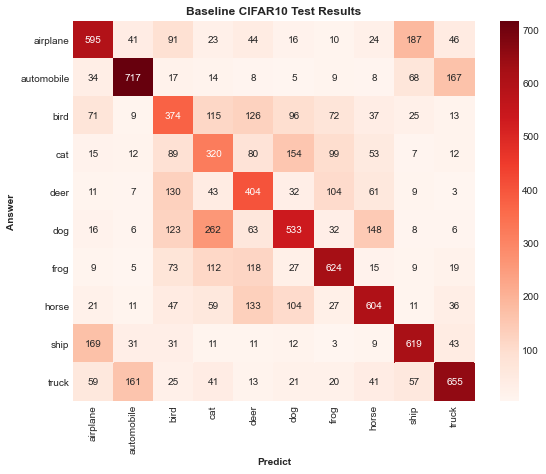

In [146]:
import seaborn as sn

# Change confusion matrix type to pd dataframe
CIFAR10_confusion_matrix = pd.DataFrame(CIFAR10_confusion_matrix)

label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
chart_label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# Plot the CIFAR10 heatmap confusion matrix 
ax = plt.subplots(figsize = (9, 7)) 
ax = plt.axes()
sn.heatmap(CIFAR10_confusion_matrix, ax = ax, annot = True, cmap = "Reds", fmt = "g")

ax.set_xticklabels(chart_label, rotation = 90)
ax.set_yticklabels(label, rotation = 360)

ax.set_title("Baseline CIFAR10 Test Results", fontweight = "bold")
plt.xlabel("Predict", fontweight = "bold")
plt.ylabel("Answer", fontweight = "bold")

plt.show()

In [11]:
# Calculate the probability of each labels
CIFAR10_confusion_matrix_probability = np.true_divide(CIFAR10_confusion_matrix, 1000)
print(CIFAR10_confusion_matrix_probability)

       0      1      2      3      4      5      6      7      8      9
0  0.595  0.041  0.091  0.023  0.044  0.016  0.010  0.024  0.187  0.046
1  0.034  0.717  0.017  0.014  0.008  0.005  0.009  0.008  0.068  0.167
2  0.071  0.009  0.374  0.115  0.126  0.096  0.072  0.037  0.025  0.013
3  0.015  0.012  0.089  0.320  0.080  0.154  0.099  0.053  0.007  0.012
4  0.011  0.007  0.130  0.043  0.404  0.032  0.104  0.061  0.009  0.003
5  0.016  0.006  0.123  0.262  0.063  0.533  0.032  0.148  0.008  0.006
6  0.009  0.005  0.073  0.112  0.118  0.027  0.624  0.015  0.009  0.019
7  0.021  0.011  0.047  0.059  0.133  0.104  0.027  0.604  0.011  0.036
8  0.169  0.031  0.031  0.011  0.011  0.012  0.003  0.009  0.619  0.043
9  0.059  0.161  0.025  0.041  0.013  0.021  0.020  0.041  0.057  0.655


In [12]:
CIFAR10_confusion_matrix_pd_type = np.array(CIFAR10_confusion_matrix_probability)

CIFAR10_confusion_matrix_pd_type = pd.DataFrame(CIFAR10_confusion_matrix_pd_type,
                                                    index = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"],
                                                    columns = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
print(CIFAR10_confusion_matrix_pd_type.head(10))

            airplane  automobile   bird    cat   deer    dog   frog  horse  \
airplane       0.595       0.041  0.091  0.023  0.044  0.016  0.010  0.024   
automobile     0.034       0.717  0.017  0.014  0.008  0.005  0.009  0.008   
bird           0.071       0.009  0.374  0.115  0.126  0.096  0.072  0.037   
cat            0.015       0.012  0.089  0.320  0.080  0.154  0.099  0.053   
deer           0.011       0.007  0.130  0.043  0.404  0.032  0.104  0.061   
dog            0.016       0.006  0.123  0.262  0.063  0.533  0.032  0.148   
frog           0.009       0.005  0.073  0.112  0.118  0.027  0.624  0.015   
horse          0.021       0.011  0.047  0.059  0.133  0.104  0.027  0.604   
ship           0.169       0.031  0.031  0.011  0.011  0.012  0.003  0.009   
truck          0.059       0.161  0.025  0.041  0.013  0.021  0.020  0.041   

             ship  truck  
airplane    0.187  0.046  
automobile  0.068  0.167  
bird        0.025  0.013  
cat         0.007  0.012  
deer  

In [13]:
# Select each column
# airplane: 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9
airplane = CIFAR10_confusion_matrix_pd_type["airplane"]
automobile = CIFAR10_confusion_matrix_pd_type["automobile"]
bird  = CIFAR10_confusion_matrix_pd_type["bird"]
cat = CIFAR10_confusion_matrix_pd_type["cat"]
deer = CIFAR10_confusion_matrix_pd_type["deer"]
dog = CIFAR10_confusion_matrix_pd_type["dog"]
frog = CIFAR10_confusion_matrix_pd_type["frog"]
horse = CIFAR10_confusion_matrix_pd_type["horse"]
ship = CIFAR10_confusion_matrix_pd_type["ship"]
truck = CIFAR10_confusion_matrix_pd_type["truck"]

### Label 0 -> airplane

In [14]:
airplane.head(10)

airplane      0.595
automobile    0.034
bird          0.071
cat           0.015
deer          0.011
dog           0.016
frog          0.009
horse         0.021
ship          0.169
truck         0.059
Name: airplane, dtype: float64

0.595 0.009


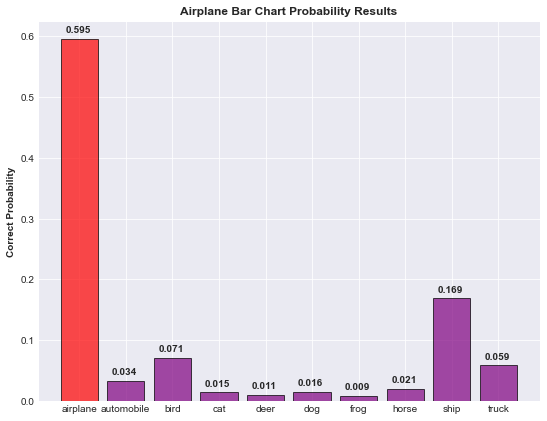

In [15]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
airplane_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
airplane_pro = [0.595, 0.034, 0.071, 0.015, 0.011, 0.016, 0.009, 0.021, 0.169, 0.059]

airplane_largest = np.max(np.array(airplane_pro))
airplane_smallest = np.min(np.array(airplane_pro))
print(airplane_largest, airplane_smallest)

airplane_color = ["red", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(airplane_label)), airplane_pro, align = "center", color = airplane_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(airplane_label)), airplane_label)

for element, v in enumerate(airplane_pro):
    plt.text(np.arange(len(airplane_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Airplane Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 1 -> automobile

In [16]:
automobile.head(10)

airplane      0.041
automobile    0.717
bird          0.009
cat           0.012
deer          0.007
dog           0.006
frog          0.005
horse         0.011
ship          0.031
truck         0.161
Name: automobile, dtype: float64

0.717 0.005


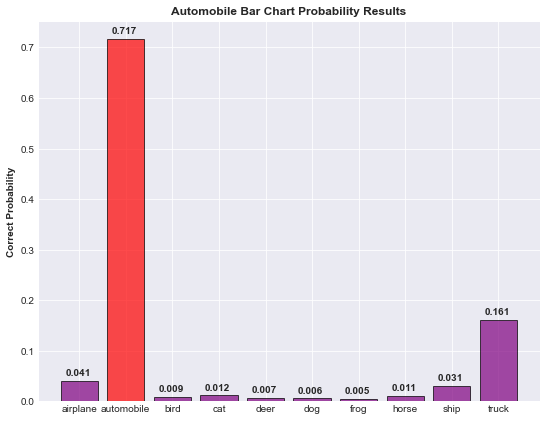

In [17]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
automobile_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
automobile_pro = [0.041, 0.717, 0.009, 0.012, 0.007, 0.006, 0.005, 0.011, 0.031, 0.161]

automobile_largest = np.max(np.array(automobile_pro))
automobile_smallest = np.min(np.array(automobile_pro))
print(automobile_largest, automobile_smallest)

automobile_color = ["purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(automobile_label)), automobile_pro, align = "center", color = automobile_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(automobile_label)), automobile_label)

for element, v in enumerate(automobile_pro):
    plt.text(np.arange(len(automobile_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Automobile Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 2 -> bird

In [18]:
bird.head(10)

airplane      0.091
automobile    0.017
bird          0.374
cat           0.089
deer          0.130
dog           0.123
frog          0.073
horse         0.047
ship          0.031
truck         0.025
Name: bird, dtype: float64

0.374 0.017


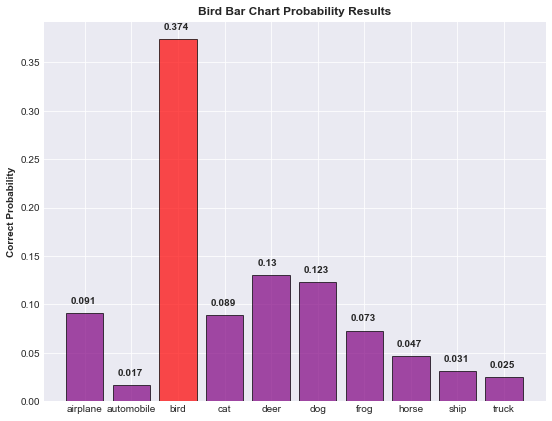

In [19]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
bird_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
bird_pro = [0.091, 0.017, 0.374, 0.089, 0.130, 0.123, 0.073, 0.047, 0.031, 0.025]

bird_largest = np.max(np.array(bird_pro))
bird_smallest = np.min(np.array(bird_pro))
print(bird_largest, bird_smallest)

bird_color = ["purple", "purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(bird_label)), bird_pro, align = "center", color = bird_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(bird_label)), bird_label)

for element, v in enumerate(bird_pro):
    plt.text(np.arange(len(bird_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Bird Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 3 -> cat

In [20]:
cat.head(10)

airplane      0.023
automobile    0.014
bird          0.115
cat           0.320
deer          0.043
dog           0.262
frog          0.112
horse         0.059
ship          0.011
truck         0.041
Name: cat, dtype: float64

0.32 0.011


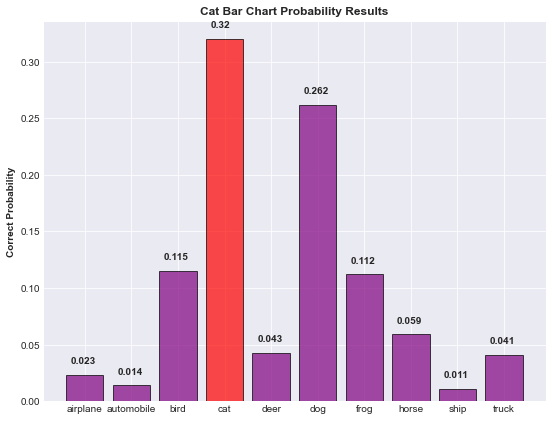

In [21]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
cat_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
cat_pro = [0.023, 0.014, 0.115, 0.320, 0.043, 0.262, 0.112, 0.059, 0.011, 0.041]

cat_largest = np.max(np.array(cat_pro))
cat_smallest = np.min(np.array(cat_pro))
print(cat_largest, cat_smallest)

cat_color = ["purple", "purple", "purple", "red", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(cat_label)), cat_pro, align = "center", color = cat_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(cat_label)), cat_label)

for element, v in enumerate(cat_pro):
    plt.text(np.arange(len(cat_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Cat Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 4 -> deer

In [22]:
deer.head(10)

airplane      0.044
automobile    0.008
bird          0.126
cat           0.080
deer          0.404
dog           0.063
frog          0.118
horse         0.133
ship          0.011
truck         0.013
Name: deer, dtype: float64

0.404 0.008


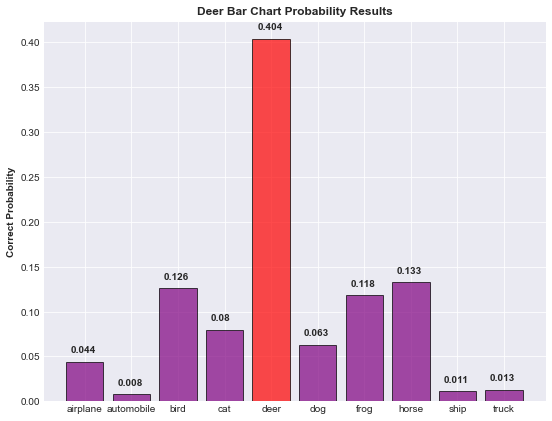

In [23]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
deer_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
deer_pro = [0.044, 0.008, 0.126, 0.080, 0.404, 0.063, 0.118, 0.133, 0.011, 0.013]

deer_largest = np.max(np.array(deer_pro))
deer_smallest = np.min(np.array(deer_pro))
print(deer_largest, deer_smallest)

deer_color = ["purple", "purple", "purple", "purple", "red", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(deer_label)), deer_pro, align = "center", color = deer_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(deer_label)), deer_label)

for element, v in enumerate(deer_pro):
    plt.text(np.arange(len(deer_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Deer Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 5 -> dog

In [24]:
dog.head(10)

airplane      0.016
automobile    0.005
bird          0.096
cat           0.154
deer          0.032
dog           0.533
frog          0.027
horse         0.104
ship          0.012
truck         0.021
Name: dog, dtype: float64

0.533 0.005


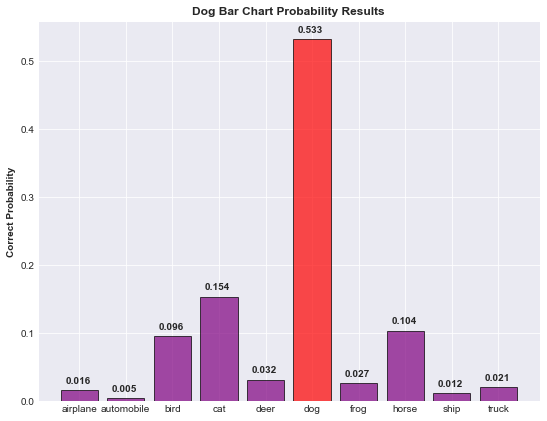

In [25]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
dog_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
dog_pro = [0.016, 0.005, 0.096, 0.154, 0.032, 0.533, 0.027, 0.104, 0.012, 0.021]

dog_largest = np.max(np.array(dog_pro))
dog_smallest = np.min(np.array(dog_pro))
print(dog_largest, dog_smallest)

dog_color = ["purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(dog_label)), dog_pro, align = "center", color = dog_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(dog_label)), dog_label)

for element, v in enumerate(dog_pro):
    plt.text(np.arange(len(dog_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Dog Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 6 -> frog

In [26]:
frog.head(10)

airplane      0.010
automobile    0.009
bird          0.072
cat           0.099
deer          0.104
dog           0.032
frog          0.624
horse         0.027
ship          0.003
truck         0.020
Name: frog, dtype: float64

0.624 0.003


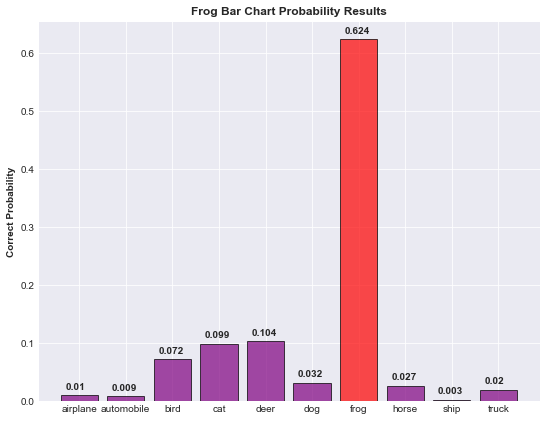

In [27]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
frog_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
frog_pro = [0.010, 0.009, 0.072, 0.099, 0.104, 0.032, 0.624, 0.027, 0.003, 0.020]

frog_largest = np.max(np.array(frog_pro))
frog_smallest = np.min(np.array(frog_pro))
print(frog_largest, frog_smallest)

frog_color = ["purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple"]

plt.bar(np.arange(len(frog_label)), frog_pro, align = "center", color = frog_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(frog_label)), frog_label)

for element, v in enumerate(frog_pro):
    plt.text(np.arange(len(frog_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Frog Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 7 -> horse

In [28]:
horse.head(10)

airplane      0.024
automobile    0.008
bird          0.037
cat           0.053
deer          0.061
dog           0.148
frog          0.015
horse         0.604
ship          0.009
truck         0.041
Name: horse, dtype: float64

0.604 0.008


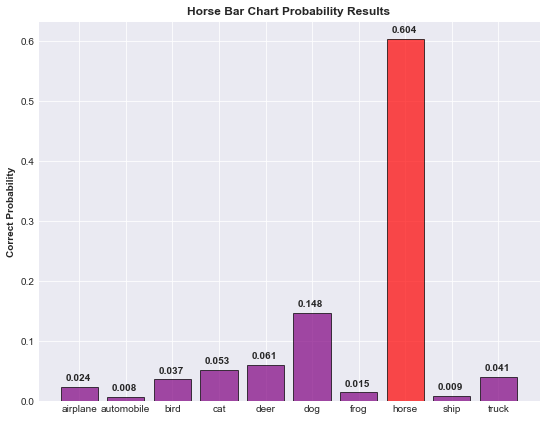

In [29]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
horse_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
horse_pro = [0.024, 0.008, 0.037, 0.053, 0.061, 0.148, 0.015, 0.604, 0.009, 0.041]

horse_largest = np.max(np.array(horse_pro))
horse_smallest = np.min(np.array(horse_pro))
print(horse_largest, horse_smallest)

horse_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple"]

plt.bar(np.arange(len(horse_label)), horse_pro, align = "center", color = horse_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(horse_label)), horse_label)

for element, v in enumerate(horse_pro):
    plt.text(np.arange(len(horse_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Horse Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 8 -> ship

In [30]:
ship.head(10)

airplane      0.187
automobile    0.068
bird          0.025
cat           0.007
deer          0.009
dog           0.008
frog          0.009
horse         0.011
ship          0.619
truck         0.057
Name: ship, dtype: float64

0.619 0.007


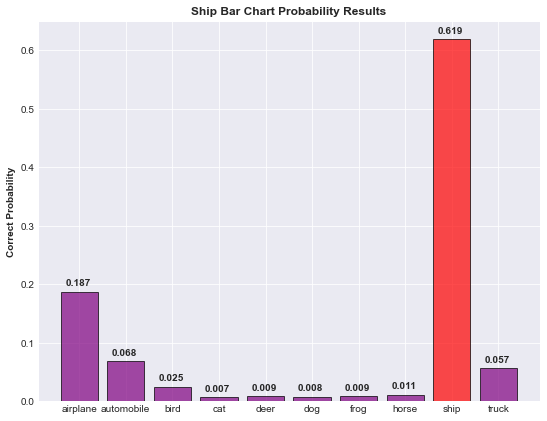

In [31]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
ship_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
ship_pro = [0.187, 0.068, 0.025, 0.007, 0.009, 0.008, 0.009, 0.011, 0.619, 0.057]

ship_largest = np.max(np.array(ship_pro))
ship_smallest = np.min(np.array(ship_pro))
print(ship_largest, ship_smallest)

ship_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple"]

plt.bar(np.arange(len(ship_label)), ship_pro, align = "center", color = ship_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(ship_label)), ship_label)

for element, v in enumerate(ship_pro):
    plt.text(np.arange(len(ship_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Ship Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 9 -> truck

In [32]:
truck.head(10)

airplane      0.046
automobile    0.167
bird          0.013
cat           0.012
deer          0.003
dog           0.006
frog          0.019
horse         0.036
ship          0.043
truck         0.655
Name: truck, dtype: float64

0.655 0.003


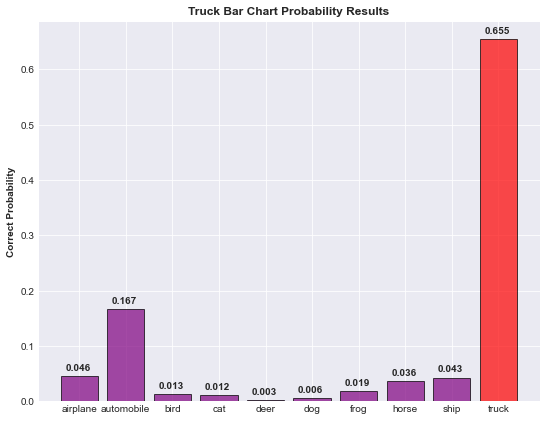

In [33]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
truck_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
truck_pro = [0.046, 0.167, 0.013, 0.012, 0.003, 0.006, 0.019, 0.036, 0.043, 0.655]

truck_largest = np.max(np.array(truck_pro))
truck_smallest = np.min(np.array(truck_pro))
print(truck_largest, truck_smallest)

truck_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red"]

plt.bar(np.arange(len(truck_label)), truck_pro, align = "center", color = truck_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(truck_label)), truck_label)

for element, v in enumerate(truck_pro):
    plt.text(np.arange(len(truck_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Truck Bar Chart Probability Results", fontweight = "bold")
plt.show()

### CIFAR100 Test Accuracy (32.03%) (Each Label 100 images)

In [34]:
CIFAR100_confusion_matrix = np.load("Baseline_CIFAR100_Confusion_Matrix.npy")

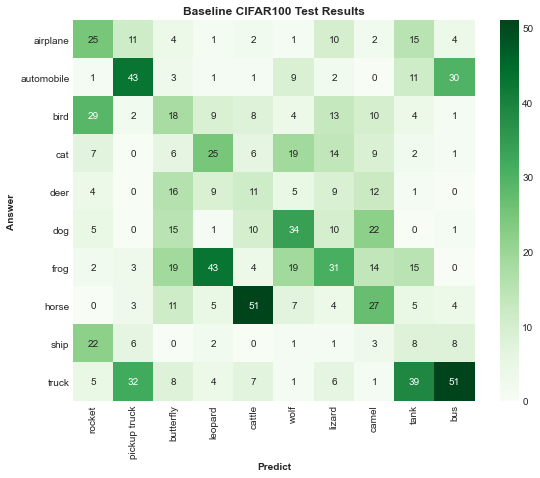

In [147]:
import seaborn as sn

# Change confusion matrix type to pd dataframe
CIFAR100_confusion_matrix = pd.DataFrame(CIFAR100_confusion_matrix)

label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
chart_label = ["rocket", "pickup truck", "butterfly", "leopard", "cattle", "wolf", "lizard", "camel", "tank", "bus"]

# Plot the CIFAR100 heatmap confusion matrix 
ax = plt.subplots(figsize = (9, 7)) 
ax = plt.axes()
sn.heatmap(CIFAR100_confusion_matrix, ax = ax, annot = True, cmap = "Greens", fmt = "g")

ax.set_xticklabels(chart_label, rotation = 90)
ax.set_yticklabels(label, rotation = 360)

ax.set_title("Baseline CIFAR100 Test Results", fontweight = "bold")
plt.xlabel("Predict", fontweight = "bold")
plt.ylabel("Answer", fontweight = "bold")

plt.show()

In [36]:
# Calculate the probability of each labels
CIFAR100_confusion_matrix_probability = np.true_divide(CIFAR100_confusion_matrix, 100)
print(CIFAR100_confusion_matrix_probability)

      0     1     2     3     4     5     6     7     8     9
0  0.25  0.11  0.04  0.01  0.02  0.01  0.10  0.02  0.15  0.04
1  0.01  0.43  0.03  0.01  0.01  0.09  0.02  0.00  0.11  0.30
2  0.29  0.02  0.18  0.09  0.08  0.04  0.13  0.10  0.04  0.01
3  0.07  0.00  0.06  0.25  0.06  0.19  0.14  0.09  0.02  0.01
4  0.04  0.00  0.16  0.09  0.11  0.05  0.09  0.12  0.01  0.00
5  0.05  0.00  0.15  0.01  0.10  0.34  0.10  0.22  0.00  0.01
6  0.02  0.03  0.19  0.43  0.04  0.19  0.31  0.14  0.15  0.00
7  0.00  0.03  0.11  0.05  0.51  0.07  0.04  0.27  0.05  0.04
8  0.22  0.06  0.00  0.02  0.00  0.01  0.01  0.03  0.08  0.08
9  0.05  0.32  0.08  0.04  0.07  0.01  0.06  0.01  0.39  0.51


In [37]:
CIFAR100_confusion_matrix_pd_type = np.array(CIFAR100_confusion_matrix_probability)

CIFAR100_confusion_matrix_pd_type = pd.DataFrame(CIFAR100_confusion_matrix_pd_type,
                                                    index = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"],
                                                    columns = ["rocket", "pickup truck", "butterfly", "leopard", "cattle", "wolf", "lizard", "camel", "tank", "bus"])
print(CIFAR100_confusion_matrix_pd_type.head(10))

            rocket  pickup truck  butterfly  leopard  cattle  wolf  lizard  \
airplane      0.25          0.11       0.04     0.01    0.02  0.01    0.10   
automobile    0.01          0.43       0.03     0.01    0.01  0.09    0.02   
bird          0.29          0.02       0.18     0.09    0.08  0.04    0.13   
cat           0.07          0.00       0.06     0.25    0.06  0.19    0.14   
deer          0.04          0.00       0.16     0.09    0.11  0.05    0.09   
dog           0.05          0.00       0.15     0.01    0.10  0.34    0.10   
frog          0.02          0.03       0.19     0.43    0.04  0.19    0.31   
horse         0.00          0.03       0.11     0.05    0.51  0.07    0.04   
ship          0.22          0.06       0.00     0.02    0.00  0.01    0.01   
truck         0.05          0.32       0.08     0.04    0.07  0.01    0.06   

            camel  tank   bus  
airplane     0.02  0.15  0.04  
automobile   0.00  0.11  0.30  
bird         0.10  0.04  0.01  
cat          

In [38]:
# Select each column
# rocket: 69 -> 0
# pickup truck : 58 -> 1
# butterfly : 14 -> 2
# leopard : 42 -> 3
# cattle : 19 -> 4
# wolf : 97 -> 5
# lizard : 44 -> 6
# camel : 15 -> 7
# tank : 85 -> 8
# bus : 13 -> 9
rocket = CIFAR100_confusion_matrix_pd_type["rocket"]
pickup_truck = CIFAR100_confusion_matrix_pd_type["pickup truck"]
butterfly  = CIFAR100_confusion_matrix_pd_type["butterfly"]
leopard = CIFAR100_confusion_matrix_pd_type["leopard"]
cattle = CIFAR100_confusion_matrix_pd_type["cattle"]
wolf = CIFAR100_confusion_matrix_pd_type["wolf"]
lizard = CIFAR100_confusion_matrix_pd_type["lizard"]
camel = CIFAR100_confusion_matrix_pd_type["camel"]
tank = CIFAR100_confusion_matrix_pd_type["tank"]
bus = CIFAR100_confusion_matrix_pd_type["bus"]

### Correct Label -> Red Color, Wrong Label -> Green Color

### Label 0 -> rocket

In [39]:
rocket.head(10)

airplane      0.25
automobile    0.01
bird          0.29
cat           0.07
deer          0.04
dog           0.05
frog          0.02
horse         0.00
ship          0.22
truck         0.05
Name: rocket, dtype: float64

0.29 0.0


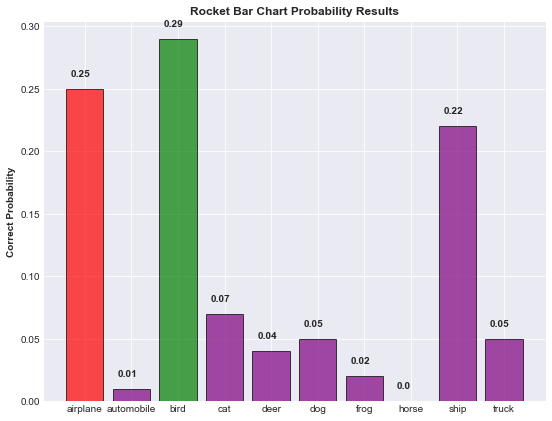

In [40]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
rocket_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
rocket_pro = [0.25, 0.01, 0.29, 0.07, 0.04, 0.05, 0.02, 0.00, 0.22, 0.05]

rocket_largest = np.max(np.array(rocket_pro))
rocket_smallest = np.min(np.array(rocket_pro))
print(rocket_largest, rocket_smallest)

rocket_color = ["red", "purple", "green", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(rocket_label)), rocket_pro, align = "center", color = rocket_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(rocket_label)), rocket_label)

for element, v in enumerate(rocket_pro):
    plt.text(np.arange(len(rocket_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Rocket Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 1 -> pickup truck

In [41]:
pickup_truck.head(10)

airplane      0.11
automobile    0.43
bird          0.02
cat           0.00
deer          0.00
dog           0.00
frog          0.03
horse         0.03
ship          0.06
truck         0.32
Name: pickup truck, dtype: float64

0.43 0.0


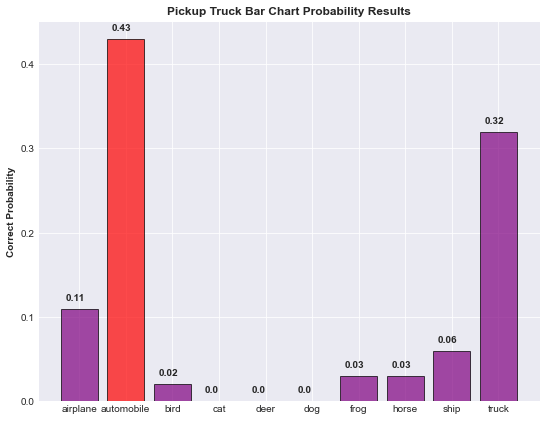

In [42]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
pickup_truck_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
pickup_truck_pro = [0.11, 0.43, 0.02, 0.00, 0.00, 0.00, 0.03, 0.03, 0.06, 0.32]

pickup_truck_largest = np.max(np.array(pickup_truck_pro))
pickup_truck_smallest = np.min(np.array(pickup_truck_pro))
print(pickup_truck_largest, pickup_truck_smallest)

pickup_truck_color = ["purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(pickup_truck_label)), pickup_truck_pro, align = "center", color = pickup_truck_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(pickup_truck_label)), pickup_truck_label)

for element, v in enumerate(pickup_truck_pro):
    plt.text(np.arange(len(pickup_truck_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Pickup Truck Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 2 -> butterfly

In [43]:
butterfly.head(10)

airplane      0.04
automobile    0.03
bird          0.18
cat           0.06
deer          0.16
dog           0.15
frog          0.19
horse         0.11
ship          0.00
truck         0.08
Name: butterfly, dtype: float64

0.19 0.0


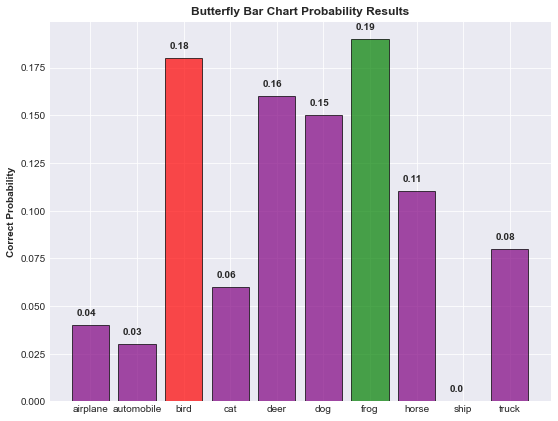

In [44]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
butterfly_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
butterfly_pro = [0.04, 0.03, 0.18, 0.06, 0.16, 0.15, 0.19, 0.11, 0.00, 0.08]

butterfly_largest = np.max(np.array(butterfly_pro))
butterfly_smallest = np.min(np.array(butterfly_pro))
print(butterfly_largest, butterfly_smallest)

butterfly_color = ["purple", "purple", "red", "purple", "purple", "purple", "green", "purple", "purple", "purple"]

plt.bar(np.arange(len(butterfly_label)), butterfly_pro, align = "center", color = butterfly_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(butterfly_label)), butterfly_label)

for element, v in enumerate(butterfly_pro):
    plt.text(np.arange(len(butterfly_label))[element] - 0.3, v + 0.005, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Butterfly Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 3 -> leopard

In [45]:
leopard.head(10)

airplane      0.01
automobile    0.01
bird          0.09
cat           0.25
deer          0.09
dog           0.01
frog          0.43
horse         0.05
ship          0.02
truck         0.04
Name: leopard, dtype: float64

0.43 0.01


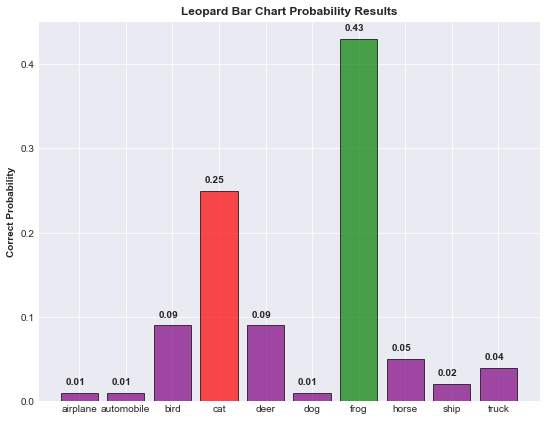

In [46]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
leopard_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
leopard_pro = [0.01, 0.01, 0.09, 0.25, 0.09, 0.01, 0.43, 0.05, 0.02, 0.04]

leopard_largest = np.max(np.array(leopard_pro))
leopard_smallest = np.min(np.array(leopard_pro))
print(leopard_largest, leopard_smallest)

leopard_color = ["purple", "purple", "purple", "red", "purple", "purple", "green", "purple", "purple", "purple"]

plt.bar(np.arange(len(leopard_label)), leopard_pro, align = "center", color = leopard_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(leopard_label)), leopard_label)

for element, v in enumerate(leopard_pro):
    plt.text(np.arange(len(leopard_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Leopard Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 4 -> cattle

In [47]:
cattle.head(10)

airplane      0.02
automobile    0.01
bird          0.08
cat           0.06
deer          0.11
dog           0.10
frog          0.04
horse         0.51
ship          0.00
truck         0.07
Name: cattle, dtype: float64

0.51 0.0


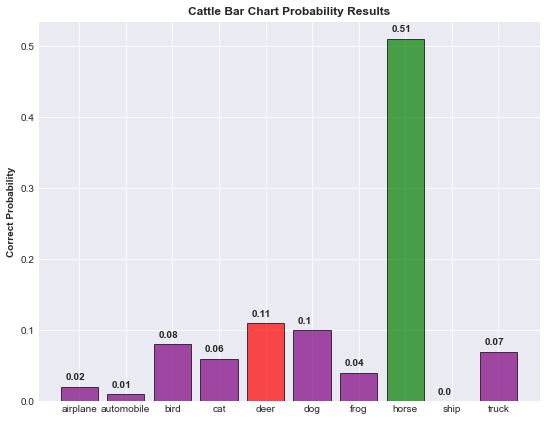

In [48]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
cattle_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
cattle_pro = [0.02, 0.01, 0.08, 0.06, 0.11, 0.10, 0.04, 0.51, 0.00, 0.07]

cattle_largest = np.max(np.array(cattle_pro))
cattle_smallest = np.min(np.array(cattle_pro))
print(cattle_largest, cattle_smallest)

cattle_color = ["purple", "purple", "purple", "purple", "red", "purple", "purple", "green", "purple", "purple"]

plt.bar(np.arange(len(cattle_label)), cattle_pro, align = "center", color = cattle_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(cattle_label)), cattle_label)

for element, v in enumerate(cattle_pro):
    plt.text(np.arange(len(cattle_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Cattle Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 5 -> wolf

In [49]:
wolf.head(10)

airplane      0.01
automobile    0.09
bird          0.04
cat           0.19
deer          0.05
dog           0.34
frog          0.19
horse         0.07
ship          0.01
truck         0.01
Name: wolf, dtype: float64

0.34 0.01


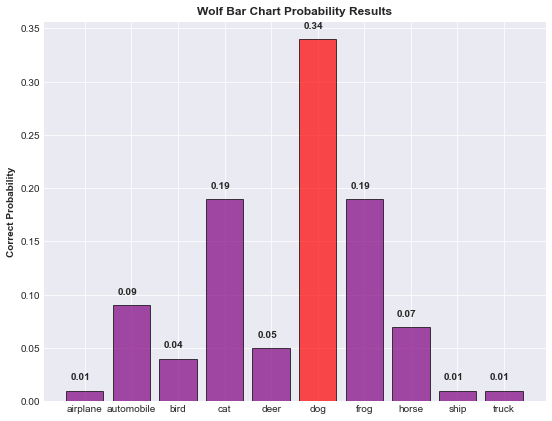

In [50]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
wolf_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
wolf_pro = [0.01, 0.09, 0.04, 0.19, 0.05, 0.34, 0.19, 0.07, 0.01, 0.01]

wolf_largest = np.max(np.array(wolf_pro))
wolf_smallest = np.min(np.array(wolf_pro))
print(wolf_largest, wolf_smallest)

wolf_color = ["purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(wolf_label)), wolf_pro, align = "center", color = wolf_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(wolf_label)), wolf_label)

for element, v in enumerate(wolf_pro):
    plt.text(np.arange(len(wolf_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Wolf Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 6 -> lizard

In [51]:
lizard.head(10)

airplane      0.10
automobile    0.02
bird          0.13
cat           0.14
deer          0.09
dog           0.10
frog          0.31
horse         0.04
ship          0.01
truck         0.06
Name: lizard, dtype: float64

0.31 0.01


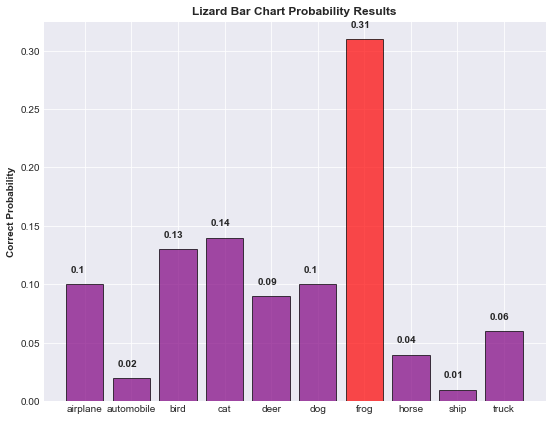

In [52]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
lizard_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
lizard_pro = [0.10, 0.02, 0.13, 0.14, 0.09, 0.10, 0.31, 0.04, 0.01, 0.06]

lizard_largest = np.max(np.array(lizard_pro))
lizard_smallest = np.min(np.array(lizard_pro))
print(lizard_largest, lizard_smallest)

lizard_color = ["purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple"]

plt.bar(np.arange(len(lizard_label)), lizard_pro, align = "center", color = lizard_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(lizard_label)), lizard_label)

for element, v in enumerate(lizard_pro):
    plt.text(np.arange(len(lizard_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Lizard Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 7 -> camel

In [53]:
camel.head(10)

airplane      0.02
automobile    0.00
bird          0.10
cat           0.09
deer          0.12
dog           0.22
frog          0.14
horse         0.27
ship          0.03
truck         0.01
Name: camel, dtype: float64

0.27 0.0


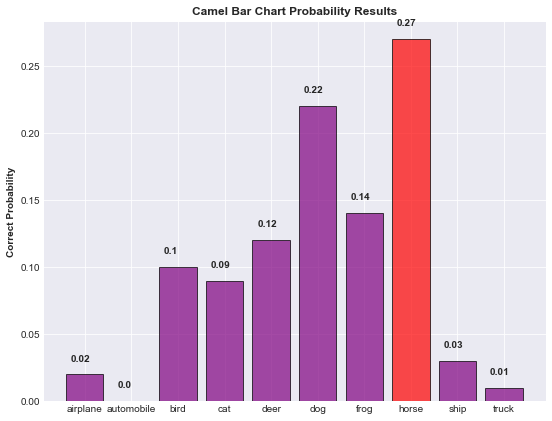

In [54]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
camel_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
camel_pro = [0.02, 0.00, 0.10, 0.09, 0.12, 0.22, 0.14, 0.27, 0.03, 0.01]

camel_largest = np.max(np.array(camel_pro))
camel_smallest = np.min(np.array(camel_pro))
print(camel_largest, camel_smallest)

camel_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple"]

plt.bar(np.arange(len(camel_label)), camel_pro, align = "center", color = camel_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(camel_label)), camel_label)

for element, v in enumerate(camel_pro):
    plt.text(np.arange(len(camel_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Camel Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 8 -> tank

In [55]:
tank.head(10)

airplane      0.15
automobile    0.11
bird          0.04
cat           0.02
deer          0.01
dog           0.00
frog          0.15
horse         0.05
ship          0.08
truck         0.39
Name: tank, dtype: float64

0.39 0.0


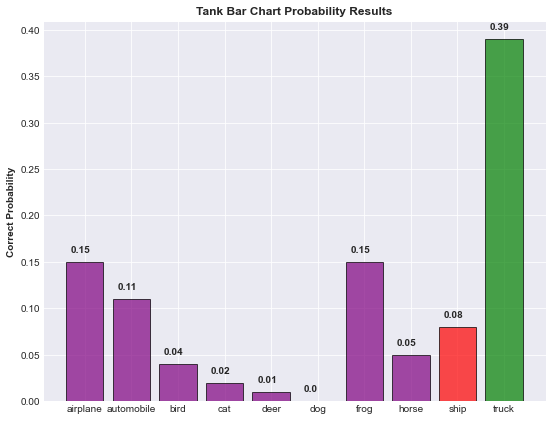

In [56]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
tank_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
tank_pro = [0.15, 0.11, 0.04, 0.02, 0.01, 0.00, 0.15, 0.05, 0.08, 0.39]

tank_largest = np.max(np.array(tank_pro))
tank_smallest = np.min(np.array(tank_pro))
print(tank_largest, tank_smallest)

tank_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "green"]

plt.bar(np.arange(len(tank_label)), tank_pro, align = "center", color = tank_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(tank_label)), tank_label)

for element, v in enumerate(tank_pro):
    plt.text(np.arange(len(tank_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Tank Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 9 -> bus

In [57]:
bus.head(10)

airplane      0.04
automobile    0.30
bird          0.01
cat           0.01
deer          0.00
dog           0.01
frog          0.00
horse         0.04
ship          0.08
truck         0.51
Name: bus, dtype: float64

0.51 0.0


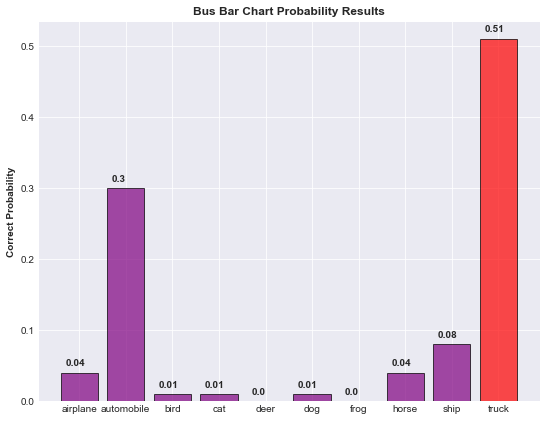

In [58]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
bus_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
bus_pro = [0.04, 0.30, 0.01, 0.01, 0.00, 0.01, 0.00, 0.04, 0.08, 0.51]

bus_largest = np.max(np.array(bus_pro))
bus_smallest = np.min(np.array(bus_pro))
print(bus_largest, bus_smallest)

bus_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red"]

plt.bar(np.arange(len(bus_label)), bus_pro, align = "center", color = bus_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(bus_label)), bus_label)

for element, v in enumerate(bus_pro):
    plt.text(np.arange(len(bus_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Bus Bar Chart Probability Results", fontweight = "bold")
plt.show()

In [59]:
nums = [1, 3, 5, 7, 5, 4, 2, 9, 8]

names = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]

# result = [max1, max2, ...]
result = []
name_result = []


def update(num, name, result, name_result):
    
    isMax = True
    
    for index in range(len(result) - 1, -1, -1):
        if num < result[index]:
            isMax = False
            break
            
    if isMax:
        result.insert(0, num)
        name_result.insert(0, name)
    else:
        result.insert(index + 1, num)
        name_result.insert(index + 1, name)
        
    if len(result) > 3:
        result.pop()
        name_result.pop()
        
    return result, name_result

for idx in range(len(nums)):
    result, name_result = update(nums[idx], names[idx], result, name_result)
    print(result)
    print(name_result)

[1]
['a']
[3, 1]
['b', 'a']
[5, 3, 1]
['c', 'b', 'a']
[7, 5, 3]
['d', 'c', 'b']
[7, 5, 5]
['d', 'e', 'c']
[7, 5, 5]
['d', 'e', 'c']
[7, 5, 5]
['d', 'e', 'c']
[9, 7, 5]
['h', 'd', 'e']
[9, 8, 7]
['h', 'i', 'd']


### CIFAR10 -> Show the Misclassified Images 

In [128]:
misclassified_CIFAR10_results = np.load("Baseline_CIFAR10_Misclassified_Images.npz", allow_pickle = True)

In [129]:
misclassified_CIFAR10_results["B_CIFAR10M"] 

array([[0.97010005, 0.9447657 , 0.93215704],
       [0.99055123, 0.89266217, 0.8810238 ],
       [0.9999998 , 0.9415943 , 0.9350945 ],
       [0.93068606, 0.92965114, 0.92560595],
       [0.9997236 , 0.9442022 , 0.9264042 ],
       [0.995299  , 0.9167664 , 0.8626906 ],
       [0.95700717, 0.7756897 , 0.7056118 ],
       [0.85820293, 0.8285459 , 0.804394  ],
       [0.944307  , 0.91562396, 0.895872  ],
       [0.9730271 , 0.9097103 , 0.90656585]], dtype=float32)

In [130]:
misclassified_CIFAR10_results["B_CIFAR10R"]

array([[[1.97813497e-03, 9.72078204e-01, 1.16987550e-03, 4.85520432e-04,
         1.50837775e-04, 1.88626902e-04, 2.59980123e-04, 7.76774483e-04,
         8.28099262e-04, 2.20837761e-02],
        [1.04412585e-02, 9.55206931e-01, 9.53931420e-04, 4.98508780e-05,
         6.18815830e-05, 2.41475191e-05, 9.91939305e-05, 1.02562226e-04,
         1.50969578e-03, 3.15505788e-02],
        [3.09318285e-02, 2.32750759e-03, 8.62123270e-04, 1.06975422e-04,
         1.29394728e-04, 2.09138434e-05, 3.18948514e-05, 9.75549210e-06,
         9.63088870e-01, 2.49065110e-03]],

       [[9.90551233e-01, 7.75484006e-13, 3.09563598e-06, 3.06301828e-08,
         8.74944776e-03, 9.92315297e-09, 2.94130899e-15, 1.05700636e-10,
         6.96204021e-04, 2.90289091e-08],
        [7.59851327e-03, 4.21126932e-02, 1.43194001e-03, 1.47678540e-03,
         6.69537287e-04, 5.76646009e-04, 2.67975102e-03, 4.07998962e-03,
         4.59913351e-03, 9.34774876e-01],
        [2.59487163e-02, 4.27447893e-02, 9.68476525e-04, 1

In [131]:
row = len(misclassified_CIFAR10_results["B_CIFAR10R"])
col = len(misclassified_CIFAR10_results["B_CIFAR10R"][0])


img_row = len(misclassified_CIFAR10_results["B_CIFAR10I"])
img_col = len(misclassified_CIFAR10_results["B_CIFAR10I"][0])
print(row, col)

print(img_row, img_col)
print(misclassified_CIFAR10_results["B_CIFAR10I"].shape)

10 3
10 3
(10, 3, 3, 32, 32)


In [132]:
CIFAR10_first = np.array([x[0] for x in misclassified_CIFAR10_results["B_CIFAR10R"]])
CIFAR10_second = np.array([x[1] for x in misclassified_CIFAR10_results["B_CIFAR10R"]])
CIFAR10_third = np.array([x[2] for x in misclassified_CIFAR10_results["B_CIFAR10R"]])

img_CIFAR10_first = np.array([x[0] for x in misclassified_CIFAR10_results["B_CIFAR10I"]])
img_CIFAR10_second = np.array([x[1] for x in misclassified_CIFAR10_results["B_CIFAR10I"]])
img_CIFAR10_third = np.array([x[2] for x in misclassified_CIFAR10_results["B_CIFAR10I"]])


print(CIFAR10_first)
print(CIFAR10_second)
print(CIFAR10_third)

[[1.97813497e-03 9.72078204e-01 1.16987550e-03 4.85520432e-04
  1.50837775e-04 1.88626902e-04 2.59980123e-04 7.76774483e-04
  8.28099262e-04 2.20837761e-02]
 [9.90551233e-01 7.75484006e-13 3.09563598e-06 3.06301828e-08
  8.74944776e-03 9.92315297e-09 2.94130899e-15 1.05700636e-10
  6.96204021e-04 2.90289091e-08]
 [9.99999881e-01 2.23594281e-18 6.22629059e-08 1.20649639e-16
  4.56171125e-12 1.52165325e-12 1.22781572e-18 5.70684891e-18
  1.94437975e-16 2.65115277e-15]
 [8.98814481e-03 1.82089116e-02 2.10559717e-03 4.62600309e-03
  9.74263821e-04 1.50918378e-03 2.20217975e-03 9.31349769e-03
  1.67599469e-02 9.35312033e-01]
 [9.99723613e-01 1.54285634e-12 2.73455837e-04 1.00976415e-10
  2.09683062e-08 2.85818305e-06 1.28656377e-10 7.61127272e-12
  4.40511932e-11 1.35093092e-09]
 [9.95429516e-01 7.99647012e-07 3.64155835e-03 8.11226710e-06
  7.25559716e-04 1.30541855e-04 1.21698349e-06 2.17263823e-06
  4.55104528e-05 1.51202112e-05]
 [3.81933688e-03 9.57273304e-01 2.32791272e-03 3.70477908e

In [135]:
# CIFAR10_transpose = np.reshape(CIFAR10_all_data, (-1, 10)) 
CIFAR10_transpose = np.vstack([CIFAR10_first, CIFAR10_second, CIFAR10_third]).reshape((3, 10, 10))


img_reshape = np.vstack([img_CIFAR10_first, img_CIFAR10_second, img_CIFAR10_third]).reshape(3, 10, 3, 32, 32)


img_CIFAR10_transpose = img_reshape.transpose((0, 1, 3, 4, 2))

# print(CIFAR10_transpose)
print(len(CIFAR10_transpose))
print(len(CIFAR10_transpose[0]))

3
10


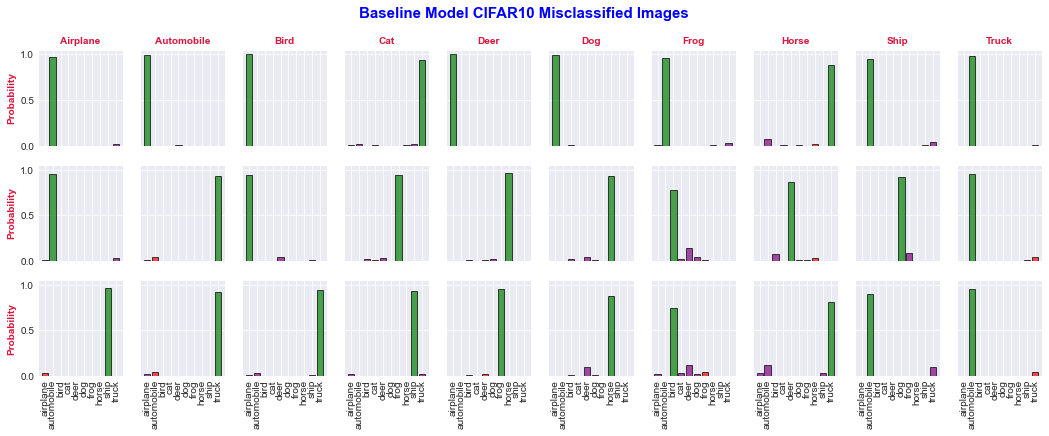

In [136]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Baseline Model CIFAR10 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(CIFAR10_transpose)):
    # Share the x-axis
    axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(CIFAR10_transpose[0])):
        
        # largest value -> green
        # current label -> red
        # other -> purple
        color = []
        
        for pro_value in CIFAR10_transpose[m][n]:
            if (pro_value < np.max(CIFAR10_transpose[m][n])):
                # when the index is equal to the current label
                if (CIFAR10_transpose[m][n].tolist().index(pro_value) == n):
                    color.append("red")
                else:
                    color.append("purple")
            # maximum probability
            else:
                color.append("green")
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")
        axs[m, n].bar(x, CIFAR10_transpose[m][n], \
                align = "center", color = color, edgecolor = "black", alpha = 0.7)
        
        if m == 2:
            # show the label name
            axs[m, n].set_xticks(x)
            axs[m, n].set_xticklabels(label, rotation = 90)
            # plt.xticks(x, label, rotation = 90)

plt.savefig("Baseline_Model_CIFAR10_Misclassified_Images.png")
plt.show()    

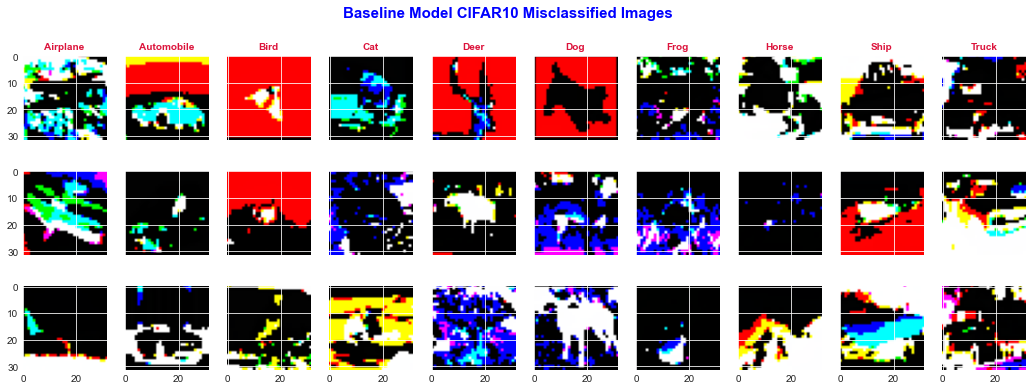

In [137]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Baseline Model CIFAR10 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(img_CIFAR10_transpose)):
    # Share the x-axis
    # axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(img_CIFAR10_transpose[0])):
        axs[m, n].imshow(img_CIFAR10_transpose[m][n].astype("uint8"))
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")

plt.savefig("Baseline_Model_CIFAR10_Misclassified_Images_Original.png")
plt.show()    

### CIFAR100 -> Show the Misclassified Images 

In [138]:
misclassified_CIFAR100_results = np.load("Baseline_CIFAR100_Misclassified_Images.npz", allow_pickle = True)

In [139]:
misclassified_CIFAR100_results["B_CIFAR100M"] 

array([[0.7985573 , 0.7973463 , 0.79615897],
       [0.9239566 , 0.86993396, 0.76917624],
       [0.93510365, 0.93333626, 0.92663646],
       [0.9193072 , 0.91581357, 0.86137784],
       [0.95285976, 0.903123  , 0.9003996 ],
       [0.8240742 , 0.8056149 , 0.7900374 ],
       [0.9106027 , 0.77444625, 0.7064846 ],
       [0.91978633, 0.77270544, 0.6681933 ],
       [0.90446186, 0.9007749 , 0.893793  ],
       [0.95050645, 0.9329052 , 0.8537168 ]], dtype=float32)

In [140]:
misclassified_CIFAR100_results["B_CIFAR100R"]

array([[[9.46673229e-02, 6.08153932e-04, 7.24483328e-03, 1.12630718e-03,
         1.16636895e-03, 1.63952296e-04, 3.82701808e-04, 6.97596406e-05,
         8.93224597e-01, 1.34596159e-03],
        [2.17659101e-02, 1.30588771e-04, 8.19112182e-01, 1.62005648e-02,
         1.01236716e-01, 9.77147277e-03, 2.66772881e-02, 1.14378042e-03,
         3.40722548e-03, 5.54112659e-04],
        [8.20498988e-02, 1.99276418e-03, 2.67128763e-03, 1.68181097e-04,
         1.72578395e-04, 4.32893066e-05, 2.11418319e-05, 1.34784510e-04,
         8.78208876e-01, 3.45373154e-02]],

       [[4.36313683e-03, 3.27536911e-02, 4.53882269e-04, 4.74093918e-04,
         8.32313090e-05, 1.63529112e-04, 3.72489332e-04, 1.76569086e-03,
         2.85988720e-03, 9.56710279e-01],
        [8.70137393e-01, 2.03435513e-04, 7.88939837e-03, 1.68204389e-03,
         3.22130807e-02, 7.19881617e-04, 1.53644014e-05, 1.10047392e-03,
         8.35687593e-02, 2.47027958e-03],
        [2.32766150e-03, 1.12758525e-01, 3.47721361e-04, 2

In [141]:
CIFAR100_first = np.array([x[0] for x in misclassified_CIFAR100_results["B_CIFAR100R"]])
CIFAR100_second = np.array([x[1] for x in misclassified_CIFAR100_results["B_CIFAR100R"]])
CIFAR100_third = np.array([x[2] for x in misclassified_CIFAR100_results["B_CIFAR100R"]])


img_CIFAR100_first = np.array([x[0] for x in misclassified_CIFAR100_results["B_CIFAR100I"]])
img_CIFAR100_second = np.array([x[1] for x in misclassified_CIFAR100_results["B_CIFAR100I"]])
img_CIFAR100_third = np.array([x[2] for x in misclassified_CIFAR100_results["B_CIFAR100I"]])

print(CIFAR100_first)
print(CIFAR100_second)
print(CIFAR100_third)

[[9.46673229e-02 6.08153932e-04 7.24483328e-03 1.12630718e-03
  1.16636895e-03 1.63952296e-04 3.82701808e-04 6.97596406e-05
  8.93224597e-01 1.34596159e-03]
 [4.36313683e-03 3.27536911e-02 4.53882269e-04 4.74093918e-04
  8.32313090e-05 1.63529112e-04 3.72489332e-04 1.76569086e-03
  2.85988720e-03 9.56710279e-01]
 [2.00166949e-04 1.63756253e-03 6.14112290e-03 1.37699535e-02
  1.34652387e-02 4.91145300e-03 9.41244781e-01 2.72089220e-03
  1.42641191e-04 1.57662369e-02]
 [4.64328186e-05 6.94373375e-05 1.19631337e-02 1.54808182e-02
  3.48154195e-02 2.01310357e-03 9.34787989e-01 6.40346203e-04
  3.63289400e-05 1.47053506e-04]
 [1.53760088e-03 3.30686598e-04 1.66937069e-03 2.49066274e-04
  2.10534651e-02 7.35251990e-04 9.32974726e-05 9.73913252e-01
  1.74095876e-05 4.00621240e-04]
 [3.39101208e-03 8.37796211e-01 6.11227984e-03 3.25894319e-02
  1.02878013e-03 1.37219951e-02 2.93966546e-03 4.35020681e-03
  1.33725619e-02 8.46979767e-02]
 [9.11495090e-01 2.46200245e-03 2.51356196e-02 2.69214343e

In [142]:
# CIFAR10_transpose = np.reshape(CIFAR10_all_data, (-1, 10)) 
CIFAR100_transpose = np.vstack([CIFAR100_first, CIFAR100_second, CIFAR100_third]).reshape((3, 10, 10))

img_reshape_100 = np.vstack([img_CIFAR100_first, img_CIFAR100_second, img_CIFAR100_third]).reshape(3, 10, 3, 32, 32)

img_CIFAR100_transpose = img_reshape_100.transpose((0, 1, 3, 4, 2))



# print(CIFAR10_transpose)
print(len(CIFAR100_transpose))
print(len(CIFAR100_transpose[0]))

3
10


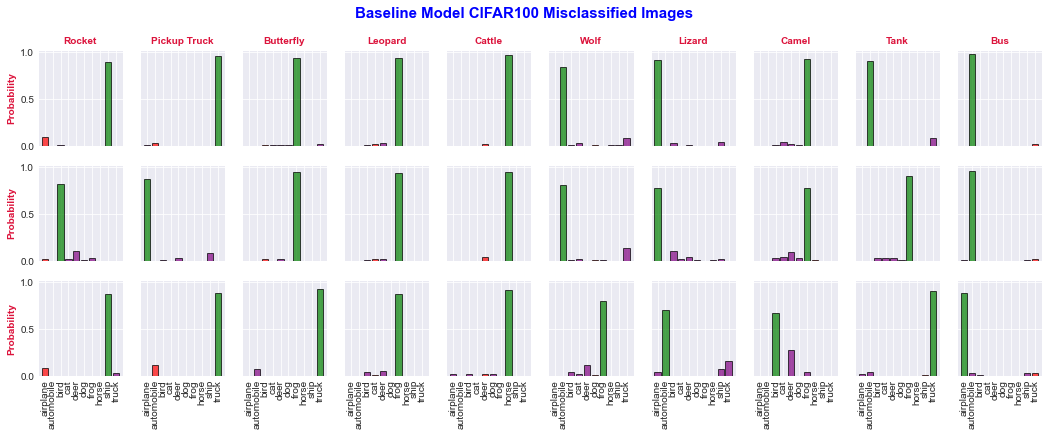

In [143]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Rocket", "Pickup Truck", "Butterfly", "Leopard", "Cattle", "Wolf", "Lizard", "Camel", "Tank", "Bus")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Baseline Model CIFAR100 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(CIFAR100_transpose)):
    # Share the x-axis
    axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(CIFAR100_transpose[0])):
        
        # largest value -> green
        # current label -> red
        # other -> purple
        color = []
        
        for pro_value in CIFAR100_transpose[m][n]:
            if (pro_value < np.max(CIFAR100_transpose[m][n])):
                # when the index is equal to the current label
                if (CIFAR100_transpose[m][n].tolist().index(pro_value) == n):
                    color.append("red")
                else:
                    color.append("purple")
            # maximum probability
            else:
                color.append("green")
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")
        axs[m, n].bar(x, CIFAR100_transpose[m][n], \
                align = "center", color = color, edgecolor = "black", alpha = 0.7)
        
        if m == 2:
            # show the label name
            axs[m, n].set_xticks(x)
            axs[m, n].set_xticklabels(label, rotation = 90)
            # plt.xticks(x, label, rotation = 90)

plt.savefig("Baseline_Model_CIFAR100_Misclassified_Images.png")
plt.show()    

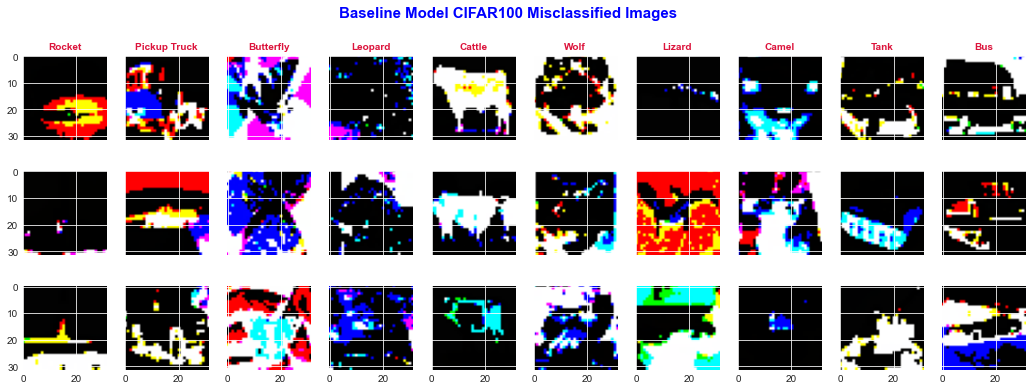

In [144]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Rocket", "Pickup Truck", "Butterfly", "Leopard", "Cattle", "Wolf", "Lizard", "Camel", "Tank", "Bus")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Baseline Model CIFAR100 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(img_CIFAR100_transpose)):
    # Share the x-axis
    # axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(img_CIFAR100_transpose[0])):
        axs[m, n].imshow(img_CIFAR100_transpose[m][n].astype("uint8"))
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")

plt.savefig("Baseline_Model_CIFAR100_Misclassified_Images_Original.png")
plt.show()